# Data from HAN, since Jan 2021
Since Jan 2021, data from charging poles have been recorded. Power can be calculated from V and I.

In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pylab 
from datetime import datetime, timedelta
import numpy as np
import json

In [2]:
data0121 = pd.read_csv(r'../../Data_HAN/Data_csv/measurements_011121.csv')
data0221 = pd.read_csv(r'../../Data_HAN/Data_csv/measurements_020121.csv')
data0321 = pd.read_csv(r'../../Data_HAN/Data_csv/measurements_030121.csv')
data0421 = pd.read_csv(r'../../Data_HAN/Data_csv/measurements_040121.csv')
data0521 = pd.read_csv(r'../../Data_HAN/Data_csv/measurements_050121.csv')
data0621 = pd.read_csv(r'../../Data_HAN/Data_csv/measurements_060121.csv')
data0721 = pd.read_csv(r'../../Data_HAN/Data_csv/measurements_070121.csv')
data0821 = pd.read_csv(r'../../Data_HAN/Data_csv/measurements_080121.csv')
data0921 = pd.read_csv(r'../../Data_HAN/Data_csv/measurements_090121.csv')
data1021 = pd.read_csv(r'../../Data_HAN/Data_csv/measurements_100121.csv')
data1121 = pd.read_csv(r'../../Data_HAN/Data_csv/measurements_110121.csv')
data1221 = pd.read_csv(r'../../Data_HAN/Data_csv/measurements_120121.csv')
data0122 = pd.read_csv(r'../../Data_HAN/Data_csv/measurements_010122.csv')
data0222 = pd.read_csv(r'../../Data_HAN/Data_csv/measurements_020122.csv')

In [3]:
data = pd.concat([data0121,data0221,data0321,data0421,data0521,data0621,data0721,data0821,data0921,data1021,data1121,data1221,data0122,data0222])

In [4]:
data

,V1,V2,V3,I1,I2,I3,P,E,F,Time,SoC,socketId,userId,userName,carId,carName
0,232.790000,221.780000,0.000000,5.500000,5.0,2.0,0.0,0.0,50.021100,1606395726,NaN,2,No ID,unknown,1,NIssan Leaf
1,232.790000,221.780000,0.000000,5.500000,5.0,2.0,0.0,0.0,50.021100,1606395726,NaN,2,No ID,unknown,404,- -
2,225.623032,229.307861,229.752029,15.090841,0.0,0.0,NaN,NaN,50.045856,1607419478,NaN,1,No ID,unknown,404,- -
3,225.653503,229.340149,229.879105,15.047119,0.0,0.0,NaN,NaN,50.054367,1607419508,NaN,1,No ID,unknown,404,- -
4,225.965988,229.547592,229.955185,15.034362,0.0,0.0,NaN,NaN,50.026932,1607419538,NaN,1,No ID,unknown,404,- -
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315231,233.496719,233.193848,232.661682,0.000000,0.0,0.0,NaN,NaN,49.992325,1643677341,NaN,3,NO ID,unknown,15,- -
315232,232.316650,233.075394,233.334839,0.000000,0.0,0.0,NaN,NaN,50.012215,1643677370,NaN,2,NO ID,unknown,15,- -
315233,232.366928,233.071945,233.318848,0.000000,0.0,0.0,NaN,NaN,50.019127,1643677383,NaN,1,NO ID,unknown,15,- -
315234,233.622818,233.186905,232.376389,0.000000,0.0,0.0,NaN,NaN,50.039127,1643677371,NaN,4,NO ID,unknown,15,- -


In [5]:
data.reset_index(drop=True, inplace=True)

Unnecessary data are dropped out of the table.

In [6]:
data.drop(['P','E','F','SoC','socketId','userId','userName','carId','carName'], axis=1, inplace=True)
data

,V1,V2,V3,I1,I2,I3,Time
0,232.790000,221.780000,0.000000,5.500000,5.0,2.0,1606395726
1,232.790000,221.780000,0.000000,5.500000,5.0,2.0,1606395726
2,225.623032,229.307861,229.752029,15.090841,0.0,0.0,1607419478
3,225.653503,229.340149,229.879105,15.047119,0.0,0.0,1607419508
4,225.965988,229.547592,229.955185,15.034362,0.0,0.0,1607419538
...,...,...,...,...,...,...,...
3693141,233.496719,233.193848,232.661682,0.000000,0.0,0.0,1643677341
3693142,232.316650,233.075394,233.334839,0.000000,0.0,0.0,1643677370
3693143,232.366928,233.071945,233.318848,0.000000,0.0,0.0,1643677383
3693144,233.622818,233.186905,232.376389,0.000000,0.0,0.0,1643677371


Incorrect data are replaced by values from nearby rows.

In [7]:
for i in range(len(data)):
    if (data.loc[i,'V1'] < -300) or (data.loc[i,'V1'] > 300):
        data.loc[i,'V1'] = data.loc[i-1,'V1']
    if (data.loc[i,'V2'] < -300) or (data.loc[i,'V2'] > 300):
        data.loc[i,'V2'] = data.loc[i-1,'V2']
    if (data.loc[i,'V3'] < -300) or (data.loc[i,'V3'] > 300):
        data.loc[i,'V3'] = data.loc[i-1,'V3']
        
    if (data.loc[i,'I1'] < -30) or (data.loc[i,'I1'] > 30):
        data.loc[i,'I1'] = data.loc[i-1,'I1']
    if (data.loc[i,'I2'] < -30) or (data.loc[i,'I2'] > 30):
        data.loc[i,'I2'] = data.loc[i-1,'I2']
    if (data.loc[i,'I3'] < -30) or (data.loc[i,'I3'] > 30):
        data.loc[i,'I3'] = data.loc[i-1,'I3']

In [8]:
power_data = data[['V1','V2','V3','I1','I2','I3','Time']]

$P = V_1\times I_1+V_2\times I_2+V_3\times I_3$

In [9]:
power=[]
for i in range(len(power_data)):
    power.append(power_data['V1'][i]*power_data['I1'][i] + power_data['V2'][i]*power_data['I2'][i] + power_data['V3'][i]*power_data['I3'][i])
power_data.loc[:,'Power'] = power

In [10]:
power_data.loc[:,'Time'] = pd.to_datetime(power_data.loc[:,'Time'],unit='s')

In [11]:
power_data

,V1,V2,V3,I1,I2,I3,Time,Power
0,232.790000,221.780000,0.000000,5.500000,5.0,2.0,2020-11-26 13:02:06,2389.245000
1,232.790000,221.780000,0.000000,5.500000,5.0,2.0,2020-11-26 13:02:06,2389.245000
2,225.623032,229.307861,229.752029,15.090841,0.0,0.0,2020-12-08 09:24:38,3404.841302
3,225.653503,229.340149,229.879105,15.047119,0.0,0.0,2020-12-08 09:25:08,3395.435112
4,225.965988,229.547592,229.955185,15.034362,0.0,0.0,2020-12-08 09:25:38,3397.254463
...,...,...,...,...,...,...,...,...
3693141,233.496719,233.193848,232.661682,0.000000,0.0,0.0,2022-02-01 01:02:21,0.000000
3693142,232.316650,233.075394,233.334839,0.000000,0.0,0.0,2022-02-01 01:02:50,0.000000
3693143,232.366928,233.071945,233.318848,0.000000,0.0,0.0,2022-02-01 01:03:03,0.000000
3693144,233.622818,233.186905,232.376389,0.000000,0.0,0.0,2022-02-01 01:02:51,0.000000


Since data are collected approximately per 30 seconds, energy (in Joule) is determined by $E = 30P$

In [12]:
power_data.loc[:,'Energy_J'] = power_data.loc[:,'Power'] * 30

In [13]:
power_data

,V1,V2,V3,I1,I2,I3,Time,Power,Energy_J
0,232.790000,221.780000,0.000000,5.500000,5.0,2.0,2020-11-26 13:02:06,2389.245000,71677.350000
1,232.790000,221.780000,0.000000,5.500000,5.0,2.0,2020-11-26 13:02:06,2389.245000,71677.350000
2,225.623032,229.307861,229.752029,15.090841,0.0,0.0,2020-12-08 09:24:38,3404.841302,102145.239055
3,225.653503,229.340149,229.879105,15.047119,0.0,0.0,2020-12-08 09:25:08,3395.435112,101863.053372
4,225.965988,229.547592,229.955185,15.034362,0.0,0.0,2020-12-08 09:25:38,3397.254463,101917.633898
...,...,...,...,...,...,...,...,...,...
3693141,233.496719,233.193848,232.661682,0.000000,0.0,0.0,2022-02-01 01:02:21,0.000000,0.000000
3693142,232.316650,233.075394,233.334839,0.000000,0.0,0.0,2022-02-01 01:02:50,0.000000,0.000000
3693143,232.366928,233.071945,233.318848,0.000000,0.0,0.0,2022-02-01 01:03:03,0.000000,0.000000
3693144,233.622818,233.186905,232.376389,0.000000,0.0,0.0,2022-02-01 01:02:51,0.000000,0.000000


In [14]:
df = power_data.set_index(['Time'])
data_hourly = df.groupby(pd.Grouper(freq='1H')).sum()

In [15]:
data_hourly.drop(['V1','V2','V3','I1','I2','I3','Power'], axis=1, inplace=True)
data_hourly

,Energy_J
Time,
2020-11-26 13:00:00,215032.05
2020-11-26 14:00:00,0.00
2020-11-26 15:00:00,0.00
2020-11-26 16:00:00,0.00
2020-11-26 17:00:00,0.00
...,...
2022-01-31 21:00:00,0.00
2022-01-31 22:00:00,0.00
2022-01-31 23:00:00,0.00


Energy in kWh is determined by $E_{kWh} = \frac{E_J}{3600000}$

In [16]:
#J to kWh
data_hourly.loc[:, 'Energy_kWh'] = data_hourly.loc[:, 'Energy_J'] / 3600000
data_hourly.drop(['Energy_J'], axis=1, inplace=True)

In [17]:
data_hourly

,Energy_kWh
Time,
2020-11-26 13:00:00,0.059731
2020-11-26 14:00:00,0.000000
2020-11-26 15:00:00,0.000000
2020-11-26 16:00:00,0.000000
2020-11-26 17:00:00,0.000000
...,...
2022-01-31 21:00:00,0.000000
2022-01-31 22:00:00,0.000000
2022-01-31 23:00:00,0.000000


## Data from HAN, before Jan 2021

In [18]:
data_old = pd.read_csv(r'../../Data_HAN/Data_csv/photonMeasure.csv')
data_old

,MeasureID,UIDtag,SocketID,V1,V2,V3,I1,I2,I3,P,E,F,Time
0,2,No ID,2,228.74,227.94,228.20,4.00,0.0,0.00,0.0,0.0,50.00,1597058398
1,3,No ID,2,228.54,227.84,227.91,4.00,0.0,0.00,0.0,0.0,49.99,1597058428
2,4,No ID,2,228.68,227.94,228.05,4.00,0.0,0.00,0.0,0.0,50.01,1597058499
3,5,No ID,2,228.71,227.93,227.99,4.00,0.0,0.00,0.0,0.0,50.03,1597058530
4,6,No ID,1,228.62,227.99,228.44,0.00,0.0,0.68,0.0,0.0,50.04,1597058530
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7606,7609,No ID,3,227.13,230.11,231.29,14.27,0.0,0.00,0.0,0.0,50.05,1605268482
7607,7610,No ID,3,227.13,230.10,231.21,14.27,0.0,0.00,0.0,0.0,50.03,1605268512
7608,7611,No ID,3,226.77,229.95,230.98,14.27,0.0,0.00,0.0,0.0,50.06,1605268542
7609,7612,No ID,3,226.50,229.45,230.60,14.27,0.0,0.00,0.0,0.0,50.04,1605268573


In [19]:
data_old.drop(['P','E','F','SocketID','UIDtag','MeasureID'], axis=1, inplace=True)
data_old

,V1,V2,V3,I1,I2,I3,Time
0,228.74,227.94,228.20,4.00,0.0,0.00,1597058398
1,228.54,227.84,227.91,4.00,0.0,0.00,1597058428
2,228.68,227.94,228.05,4.00,0.0,0.00,1597058499
3,228.71,227.93,227.99,4.00,0.0,0.00,1597058530
4,228.62,227.99,228.44,0.00,0.0,0.68,1597058530
...,...,...,...,...,...,...,...
7606,227.13,230.11,231.29,14.27,0.0,0.00,1605268482
7607,227.13,230.10,231.21,14.27,0.0,0.00,1605268512
7608,226.77,229.95,230.98,14.27,0.0,0.00,1605268542
7609,226.50,229.45,230.60,14.27,0.0,0.00,1605268573


In [20]:
for i in range(len(data_old)):
    if (data_old.loc[i,'V1'] < -300) or (data_old.loc[i,'V1'] > 300):
        data_old.loc[i,'V1'] = data_old.loc[i-1,'V1']
    if (data_old.loc[i,'V2'] < -300) or (data_old.loc[i,'V2'] > 300):
        data_old.loc[i,'V2'] = data_old.loc[i-1,'V2']
    if (data_old.loc[i,'V3'] < -300) or (data_old.loc[i,'V3'] > 300):
        data_old.loc[i,'V3'] = data_old.loc[i-1,'V3']
        
    if (data_old.loc[i,'I1'] < -30) or (data_old.loc[i,'I1'] > 30):
        data_old.loc[i,'I1'] = data_old.loc[i-1,'I1']
    if (data_old.loc[i,'I2'] < -30) or (data_old.loc[i,'I2'] > 30):
        data_old.loc[i,'I2'] = data_old.loc[i-1,'I2']
    if (data_old.loc[i,'I3'] < -30) or (data_old.loc[i,'I3'] > 30):
        data_old.loc[i,'I3'] = data_old.loc[i-1,'I3']

In [21]:
data_old.loc[:,'Power'] = data_old.loc[:,'V1']*data_old.loc[:,'I1'] + data_old.loc[:,'V2']*data_old.loc[:,'I2'] + data_old.loc[:,'V3']*data_old.loc[:,'I3']

In [22]:
data_old.loc[:,'Time'] = pd.to_datetime(data_old.loc[:,'Time'],unit='s')

In [23]:
data_old

,V1,V2,V3,I1,I2,I3,Time,Power
0,228.74,227.94,228.20,4.00,0.0,0.00,2020-08-10 11:19:58,914.9600
1,228.54,227.84,227.91,4.00,0.0,0.00,2020-08-10 11:20:28,914.1600
2,228.68,227.94,228.05,4.00,0.0,0.00,2020-08-10 11:21:39,914.7200
3,228.71,227.93,227.99,4.00,0.0,0.00,2020-08-10 11:22:10,914.8400
4,228.62,227.99,228.44,0.00,0.0,0.68,2020-08-10 11:22:10,155.3392
...,...,...,...,...,...,...,...,...
7606,227.13,230.11,231.29,14.27,0.0,0.00,2020-11-13 11:54:42,3241.1451
7607,227.13,230.10,231.21,14.27,0.0,0.00,2020-11-13 11:55:12,3241.1451
7608,226.77,229.95,230.98,14.27,0.0,0.00,2020-11-13 11:55:42,3236.0079
7609,226.50,229.45,230.60,14.27,0.0,0.00,2020-11-13 11:56:13,3232.1550


In [24]:
data_old.loc[:,'Energy_J'] = data_old.loc[:,'Power'] * 30

In [25]:
df = data_old.set_index(['Time'])

In [26]:
data_old_hourly = df[['Energy_J']].groupby(pd.Grouper(freq='1H')).sum()
data_old_hourly

,Energy_J
Time,
2020-08-10 11:00:00,3290577.753
2020-08-10 12:00:00,2774682.570
2020-08-10 13:00:00,107665.746
2020-08-10 14:00:00,1912301.382
2020-08-10 15:00:00,0.000
...,...
2022-05-06 23:00:00,0.000
2022-05-07 00:00:00,0.000
2022-05-07 01:00:00,0.000


In [27]:
data_old_hourly.loc[:,'Energy_kWh'] = data_old_hourly.loc[:,'Energy_J'] / 3600000

In [28]:
# 2020-11-26 is the first day of the new data
data_old_hourly = data_old_hourly[data_old_hourly.index < pd.to_datetime('2020-11-26 13:02:06', format='%Y-%m-%d %H:%M:%S')]

In [29]:
data_old_hourly

,Energy_J,Energy_kWh
Time,,
2020-08-10 11:00:00,3290577.753,0.914049
2020-08-10 12:00:00,2774682.570,0.770745
2020-08-10 13:00:00,107665.746,0.029907
2020-08-10 14:00:00,1912301.382,0.531195
2020-08-10 15:00:00,0.000,0.000000
...,...,...
2020-11-26 09:00:00,0.000,0.000000
2020-11-26 10:00:00,0.000,0.000000
2020-11-26 11:00:00,0.000,0.000000


## Combine old and new data

In [30]:
data_total = pd.concat([data_old_hourly[['Energy_kWh']], data_hourly])

In [31]:
data_total

,Energy_kWh
Time,
2020-08-10 11:00:00,0.914049
2020-08-10 12:00:00,0.770745
2020-08-10 13:00:00,0.029907
2020-08-10 14:00:00,0.531195
2020-08-10 15:00:00,0.000000
...,...
2022-01-31 21:00:00,0.000000
2022-01-31 22:00:00,0.000000
2022-01-31 23:00:00,0.000000


## COVID_19 measures at HAN
### 29/09/2020
Do not go to HAN is there is no class/meeting
### 16/12/2020
All activities were back online
student still came to HAN for exams
### 01/02/2021
A number of students can go back to school and have some offline classes, but not all.
### 06/02/2021
Snow storm
### 25/09/2021
1.5-meter measure for higher education was left, no more group size limit -> more onsite activities

In [32]:
data_total.loc[:, 'day_week'] = data_total.index.day_of_week

# Caltech - ACN data
location: Caltech

A research university located in Pasadena, CA. We currently collect data from 54 EVSEs in one campus garage. The site is open to the public but most usage is from faculty, staff and students.

timezone: GMT-8

In [33]:
dataACN = json.load(open(r'../../Data_ACN/acndata_sessions.json'))
data_caltech = pd.DataFrame(dataACN["_items"])

In [34]:
data_caltech

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,5bc90cb9f9af8b0d7fe77cd2,0039,"Wed, 25 Apr 2018 11:08:04 GMT","Wed, 25 Apr 2018 13:20:10 GMT","Wed, 25 Apr 2018 13:21:10 GMT",7.932,2_39_78_362_2018-04-25 11:08:04.400812,0002,CA-496,2-39-78-362,America/Los_Angeles,None,None
1,5bc90cb9f9af8b0d7fe77cd3,0039,"Wed, 25 Apr 2018 13:45:10 GMT","Thu, 26 Apr 2018 00:56:16 GMT","Wed, 25 Apr 2018 16:44:15 GMT",10.013,2_39_95_27_2018-04-25 13:45:09.617470,0002,CA-319,2-39-95-27,America/Los_Angeles,None,None
2,5bc90cb9f9af8b0d7fe77cd4,0039,"Wed, 25 Apr 2018 13:45:50 GMT","Wed, 25 Apr 2018 23:04:45 GMT","Wed, 25 Apr 2018 14:51:44 GMT",5.257,2_39_79_380_2018-04-25 13:45:49.962001,0002,CA-489,2-39-79-380,America/Los_Angeles,None,None
3,5bc90cb9f9af8b0d7fe77cd5,0039,"Wed, 25 Apr 2018 14:37:06 GMT","Wed, 25 Apr 2018 23:55:34 GMT","Wed, 25 Apr 2018 16:05:22 GMT",5.177,2_39_79_379_2018-04-25 14:37:06.460772,0002,CA-327,2-39-79-379,America/Los_Angeles,None,None
4,5bc90cb9f9af8b0d7fe77cd6,0039,"Wed, 25 Apr 2018 14:40:34 GMT","Wed, 25 Apr 2018 23:03:12 GMT","Wed, 25 Apr 2018 17:40:30 GMT",10.119,2_39_79_381_2018-04-25 14:40:33.638896,0002,CA-490,2-39-79-381,America/Los_Angeles,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31419,61550519f9af8b76960e169a,0039,"Mon, 13 Sep 2021 21:12:53 GMT","Tue, 14 Sep 2021 00:25:36 GMT","Mon, 13 Sep 2021 21:41:31 GMT",2.285,2_39_89_25_2021-09-13 21:12:53.318460,0002,CA-315,2-39-89-25,America/Los_Angeles,000000431,"[{'WhPerMile': 286, 'kWhRequested': 28.6, 'mil..."
31420,61550519f9af8b76960e169b,0039,"Mon, 13 Sep 2021 21:17:04 GMT","Tue, 14 Sep 2021 01:01:49 GMT","Mon, 13 Sep 2021 23:18:07 GMT",6.715,2_39_123_23_2021-09-13 21:16:44.026068,0002,CA-313,2-39-123-23,America/Los_Angeles,000006481,"[{'WhPerMile': 460, 'kWhRequested': 11.5, 'mil..."
31421,61550519f9af8b76960e169c,0039,"Mon, 13 Sep 2021 22:33:07 GMT","Mon, 13 Sep 2021 23:06:55 GMT",None,17.720,2_39_81_4550_2021-09-13 22:33:04.543952,0002,11900388,2-39-81-4550,America/Los_Angeles,000003905,"[{'WhPerMile': 300, 'kWhRequested': 30.0, 'mil..."
31422,61550519f9af8b76960e169d,0039,"Mon, 13 Sep 2021 23:11:12 GMT","Tue, 14 Sep 2021 01:43:11 GMT","Tue, 14 Sep 2021 00:13:35 GMT",2.018,2_39_91_437_2021-09-13 23:10:59.528292,0002,CA-317,2-39-91-437,America/Los_Angeles,000001082,"[{'WhPerMile': 290, 'kWhRequested': 5.8, 'mile..."


In [35]:
'''A function to convert time in the dataset to pandas.timestamp'''
def toTimeStamp(string):
    return pd.Timestamp(string[4:-4])


'''A function to extract useful information from the dataset including duration and energy delivered of each charging session'''
def extractData(raw_data):
    out_data = raw_data.drop(['_id','clusterID','sessionID','siteID','spaceID','stationID','timezone','userID','userInputs'], axis=1)
    # If the plug was pulled out before the battery was fully charged, the doneChargingTime is the disconnectTime
    for i in range(len(out_data)):
        if out_data.iloc[i]['doneChargingTime'] is None:
            out_data.loc[i, 'doneChargingTime'] = out_data.iloc[i]['disconnectTime']
    out_data.drop(['disconnectTime'], axis=1, inplace=True)
    out_data['connectionTime'] = out_data['connectionTime'].map(toTimeStamp)
    out_data['doneChargingTime'] = out_data['doneChargingTime'].map(toTimeStamp)
    # Calculate the duration of sessions
    for i in range(len(out_data)):
        out_data.loc[i,'duration'] = (out_data.iloc[i]['doneChargingTime'] - out_data.iloc[i]['connectionTime']).total_seconds()/3600
    # Calculated the amount of energy delivered per hour for each session
    out_data.loc[:, 'perHour'] = out_data.loc[:, 'kWhDelivered']/out_data.loc[:, 'duration']
    return out_data

In [36]:
data_extracted = extractData(data_caltech)
data_extracted

,connectionTime,doneChargingTime,kWhDelivered,duration,perHour
0,2018-04-25 11:08:04,2018-04-25 13:21:10,7.932,2.218333,3.575657
1,2018-04-25 13:45:10,2018-04-25 16:44:15,10.013,2.984722,3.354751
2,2018-04-25 13:45:50,2018-04-25 14:51:44,5.257,1.098333,4.786343
3,2018-04-25 14:37:06,2018-04-25 16:05:22,5.177,1.471111,3.519109
4,2018-04-25 14:40:34,2018-04-25 17:40:30,10.119,2.998889,3.374250
...,...,...,...,...,...
31419,2021-09-13 21:12:53,2021-09-13 21:41:31,2.285,0.477222,4.788126
31420,2021-09-13 21:17:04,2021-09-13 23:18:07,6.715,2.017500,3.328377
31421,2021-09-13 22:33:07,2021-09-13 23:06:55,17.720,0.563333,31.455621
31422,2021-09-13 23:11:12,2021-09-14 00:13:35,2.018,1.039722,1.940903


If the charging process is not finished, the end of the session is the disconnectTime

The energy delivered per hour is calculated by $\frac{kWhDelivered}{duration}$

## Turn the ACN data to the hourly data

In [37]:
'''A function to convert charging session data to hourly charging demand data'''
def toHourly(in_data):
    # Create a new dataframe
    times = pd.date_range(in_data.loc[0, 'connectionTime'].replace(second=0, minute=0), in_data.iloc[-1]['doneChargingTime'].replace(second=0, minute=0), freq='H')
    out_data = pd.DataFrame({'time':times, 'Energy_kWh':np.zeros(len(times))})
    out_data.set_index('time', inplace=True)
    # Convert to time series
    for i in range(len(in_data)):
        head = in_data.loc[i, 'connectionTime']
        tail = in_data.loc[i, 'connectionTime'].replace(second=0, minute=0) + timedelta(seconds = 3600)
        while in_data.loc[i, 'doneChargingTime'] > tail:
            out_data.loc[str(head.replace(second=0, minute=0)), 'Energy_kWh'] += (((tail-head).total_seconds()/3600) * in_data.loc[i, 'perHour'])
            head = tail
            tail = tail + timedelta(seconds = 3600)
        tail = in_data.loc[i, 'doneChargingTime']
        out_data.loc[str(tail.replace(second=0, minute=0)), 'Energy_kWh'] += (((tail-head).total_seconds()/3600) * in_data.loc[i, 'perHour'])
    return out_data

In [38]:
data_refined = toHourly(data_extracted)

/tmp/ipykernel_30831/1802235362.py:16: RuntimeWarning: invalid value encountered in double_scalars
  out_data.loc[str(tail.replace(second=0, minute=0)), 'Energy_kWh'] += (((tail-head).total_seconds()/3600) * in_data.loc[i, 'perHour'])


In [39]:
data_refined

,Energy_kWh
time,
2018-04-25 11:00:00,3.094930
2018-04-25 12:00:00,3.575657
2018-04-25 13:00:00,3.220890
2018-04-25 14:00:00,12.224048
2018-04-25 15:00:00,36.981414
...,...
2021-09-13 23:00:00,26.987689
2021-09-14 00:00:00,5.856552
2021-09-14 01:00:00,4.586113


In [40]:
data_refined[data_refined['Energy_kWh'].isnull()]

,Energy_kWh
time,
2018-05-07 20:00:00,NaN


In [41]:
# Replace NaN by 0
data_refined.loc['2018-05-07 20:00:00', 'Energy_kWh'] = 0

In [42]:
data_refined.loc[:, 'day_week'] = data_refined.index.day_of_week

# Office 1 - ACN data

An office building located in the Silicon Valley area. It currently has 8 EVSEs and is used only by employees.

In [43]:
dataACN = json.load(open(r'../../Data_ACN/acndata_sessions_office1.json'))
data_office = pd.DataFrame(dataACN["_items"])
data_office

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,5cd1d47af9af8b68f0e96713,0102,"Mon, 25 Mar 2019 16:24:42 GMT","Tue, 26 Mar 2019 01:32:12 GMT","Mon, 25 Mar 2019 17:32:48 GMT",6.146,19_102_260_1633_2019-03-25 16:24:42.408146,0019,02,19-102-260-1633,America/Los_Angeles,None,None
1,5cd1d47af9af8b68f0e96714,0102,"Mon, 25 Mar 2019 17:19:27 GMT","Tue, 26 Mar 2019 00:38:50 GMT","Mon, 25 Mar 2019 18:00:49 GMT",3.658,19_102_260_1634_2019-03-25 17:19:26.896309,0019,03,19-102-260-1634,America/Los_Angeles,None,None
2,5cd1d47af9af8b68f0e96715,0102,"Mon, 25 Mar 2019 21:27:32 GMT","Tue, 26 Mar 2019 03:32:03 GMT","Tue, 26 Mar 2019 02:10:40 GMT",28.330,19_102_260_1640_2019-03-25 21:27:32.338192,0019,08,19-102-260-1640,America/Los_Angeles,None,None
3,5cd1d47df9af8b68f0e96716,0102,"Tue, 26 Mar 2019 18:33:56 GMT","Wed, 27 Mar 2019 00:45:33 GMT","Tue, 26 Mar 2019 22:30:58 GMT",12.978,19_102_260_1640_2019-03-26 18:33:56.204855,0019,08,19-102-260-1640,America/Los_Angeles,None,None
4,5cd1d47ef9af8b68f0e96717,0102,"Wed, 27 Mar 2019 18:28:01 GMT","Thu, 28 Mar 2019 00:37:47 GMT","Wed, 27 Mar 2019 21:44:03 GMT",10.688,19_102_260_1640_2019-03-27 18:28:00.642220,0019,08,19-102-260-1640,America/Los_Angeles,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,614fbf0df9af8b6e4f11442d,0102,"Thu, 09 Sep 2021 21:11:44 GMT","Fri, 10 Sep 2021 03:47:58 GMT","Fri, 10 Sep 2021 03:47:33 GMT",19.342,19_102_260_1640_2021-09-09 21:11:26.620176,0019,08,19-102-260-1640,America/Los_Angeles,000006140,"[{'WhPerMile': 258, 'kWhRequested': 72.24, 'mi..."
1679,6151108ff9af8b70789b4fed,0102,"Fri, 10 Sep 2021 15:33:08 GMT","Fri, 10 Sep 2021 23:53:29 GMT","Fri, 10 Sep 2021 22:49:37 GMT",33.186,19_102_260_1634_2021-09-10 15:32:59.042125,0019,03,19-102-260-1634,America/Los_Angeles,000006620,"[{'WhPerMile': 1428, 'kWhRequested': 114.24, '..."
1680,6151108ff9af8b70789b4fee,0102,"Fri, 10 Sep 2021 21:12:26 GMT","Sat, 11 Sep 2021 04:25:47 GMT","Sat, 11 Sep 2021 04:25:34 GMT",19.894,19_102_260_1640_2021-09-10 21:12:15.541083,0019,08,19-102-260-1640,America/Los_Angeles,000006140,"[{'WhPerMile': 258, 'kWhRequested': 72.24, 'mi..."
1681,61550514f9af8b76948f5921,0102,"Mon, 13 Sep 2021 17:35:32 GMT","Tue, 14 Sep 2021 00:26:25 GMT","Tue, 14 Sep 2021 00:26:05 GMT",26.688,19_102_260_1634_2021-09-13 17:35:24.605831,0019,03,19-102-260-1634,America/Los_Angeles,000006620,"[{'WhPerMile': 1428, 'kWhRequested': 114.24, '..."


In [44]:
data_extracted_office = extractData(data_office)
data_extracted_office

,connectionTime,doneChargingTime,kWhDelivered,duration,perHour
0,2019-03-25 16:24:42,2019-03-25 17:32:48,6.146,1.135000,5.414978
1,2019-03-25 17:19:27,2019-03-25 18:00:49,3.658,0.689444,5.305721
2,2019-03-25 21:27:32,2019-03-26 02:10:40,28.330,4.718889,6.003532
3,2019-03-26 18:33:56,2019-03-26 22:30:58,12.978,3.950556,3.285108
4,2019-03-27 18:28:01,2019-03-27 21:44:03,10.688,3.267222,3.271280
...,...,...,...,...,...
1678,2021-09-09 21:11:44,2021-09-10 03:47:33,19.342,6.596944,2.931963
1679,2021-09-10 15:33:08,2021-09-10 22:49:37,33.186,7.274722,4.561824
1680,2021-09-10 21:12:26,2021-09-11 04:25:34,19.894,7.218889,2.755826
1681,2021-09-13 17:35:32,2021-09-14 00:26:05,26.688,6.842500,3.900329


In [45]:
data_refined_office = toHourly(data_extracted_office)
data_refined_office

,Energy_kWh
time,
2019-03-25 16:00:00,3.185812
2019-03-25 17:00:00,6.545971
2019-03-25 18:00:00,0.072217
2019-03-25 19:00:00,0.000000
2019-03-25 20:00:00,0.000000
...,...
2021-09-13 23:00:00,6.651671
2021-09-14 00:00:00,4.446902
2021-09-14 01:00:00,2.751342


In [46]:
data_refined_office.loc[:, 'day_week'] = data_refined_office.index.day_of_week

# JPL - ACN data

A national research lab located in La Canada, CA. This site currently has 50 EVSEs and is only open to employees. It is indicative of a normal workplace schedule.

In [47]:
dataACN = json.load(open(r'../../Data_ACN/acndata_sessions_JPL.json'))
data_JPL = pd.DataFrame(dataACN["_items"])
data_JPL

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,5c36621bf9af8b4639a8e0b4,0001,"Wed, 05 Sep 2018 11:04:13 GMT","Wed, 05 Sep 2018 19:09:35 GMT",None,9.583,1_1_179_800_2018-09-05 11:04:12.876087,0001,AG-3F32,1-1-179-800,America/Los_Angeles,None,None
1,5c36621bf9af8b4639a8e0b5,0001,"Wed, 05 Sep 2018 11:08:09 GMT","Wed, 05 Sep 2018 14:09:02 GMT",None,7.114,1_1_179_794_2018-09-05 11:08:08.945820,0001,AG-3F20,1-1-179-794,America/Los_Angeles,000000333,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
2,5c36621bf9af8b4639a8e0b6,0001,"Wed, 05 Sep 2018 12:35:14 GMT","Thu, 06 Sep 2018 00:30:12 GMT",None,11.774,1_1_179_797_2018-09-05 12:35:14.070250,0001,AG-3F23,1-1-179-797,America/Los_Angeles,000000371,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,5c36621bf9af8b4639a8e0b7,0001,"Wed, 05 Sep 2018 12:51:31 GMT","Wed, 05 Sep 2018 22:32:58 GMT",None,6.280,1_1_179_781_2018-09-05 12:51:31.050539,0001,AG-3F31,1-1-179-781,America/Los_Angeles,000000405,"[{'WhPerMile': 600, 'kWhRequested': 12.0, 'mil..."
4,5c36621bf9af8b4639a8e0b8,0001,"Wed, 05 Sep 2018 13:08:28 GMT","Wed, 05 Sep 2018 23:32:52 GMT",None,7.022,1_1_179_787_2018-09-05 13:08:27.901538,0001,AG-3F16,1-1-179-787,America/Los_Angeles,000000368,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33633,6155053bf9af8b76960e16cd,0001,"Mon, 13 Sep 2021 20:10:59 GMT","Mon, 13 Sep 2021 21:56:32 GMT","Mon, 13 Sep 2021 21:56:27 GMT",10.133,1_1_193_819_2021-09-13 20:10:43.199385,0001,AG-1F06,1-1-193-819,America/Los_Angeles,000009851,"[{'WhPerMile': 278, 'kWhRequested': 27.8, 'mil..."
33634,6155053bf9af8b76960e16ce,0001,"Mon, 13 Sep 2021 20:51:51 GMT","Tue, 14 Sep 2021 03:17:55 GMT","Tue, 14 Sep 2021 01:34:15 GMT",23.863,1_1_193_825_2021-09-13 20:51:37.702875,0001,AG-1F01,1-1-193-825,America/Los_Angeles,000000394,"[{'WhPerMile': 283, 'kWhRequested': 28.3, 'mil..."
33635,6155053bf9af8b76960e16cf,0001,"Mon, 13 Sep 2021 21:37:59 GMT","Tue, 14 Sep 2021 00:12:49 GMT","Tue, 14 Sep 2021 00:12:36 GMT",8.547,1_1_178_824_2021-09-13 21:37:44.554924,0001,AG-1F07,1-1-178-824,America/Los_Angeles,000003687,"[{'WhPerMile': 279, 'kWhRequested': 75.051, 'm..."
33636,6155053bf9af8b76960e16d0,0001,"Tue, 14 Sep 2021 01:08:16 GMT","Tue, 14 Sep 2021 01:31:24 GMT","Tue, 14 Sep 2021 01:31:19 GMT",1.253,1_1_179_783_2021-09-14 01:08:03.220292,0001,AG-3F29,1-1-179-783,America/Los_Angeles,000006023,"[{'WhPerMile': 310, 'kWhRequested': 15.5, 'mil..."


In [48]:
data_extracted_JPL = extractData(data_JPL)
data_extracted_JPL

,connectionTime,doneChargingTime,kWhDelivered,duration,perHour
0,2018-09-05 11:04:13,2018-09-05 19:09:35,9.583,8.089444,1.184630
1,2018-09-05 11:08:09,2018-09-05 14:09:02,7.114,3.014722,2.359753
2,2018-09-05 12:35:14,2018-09-06 00:30:12,11.774,11.916111,0.988074
3,2018-09-05 12:51:31,2018-09-05 22:32:58,6.280,9.690833,0.648035
4,2018-09-05 13:08:28,2018-09-05 23:32:52,7.022,10.406667,0.674760
...,...,...,...,...,...
33633,2021-09-13 20:10:59,2021-09-13 21:56:27,10.133,1.757778,5.764665
33634,2021-09-13 20:51:51,2021-09-14 01:34:15,23.863,4.706667,5.070042
33635,2021-09-13 21:37:59,2021-09-14 00:12:36,8.547,2.576944,3.316719
33636,2021-09-14 01:08:16,2021-09-14 01:31:19,1.253,0.384167,3.261605


In [49]:
data_refined_JPL = toHourly(data_extracted_JPL)
data_refined_JPL

,Energy_kWh
time,
2018-09-05 11:00:00,3.140597
2018-09-05 12:00:00,4.043863
2018-09-05 13:00:00,10.014561
2018-09-05 14:00:00,19.420151
2018-09-05 15:00:00,19.694294
...,...
2021-09-14 10:00:00,5.963001
2021-09-14 11:00:00,5.963001
2021-09-14 12:00:00,5.963001


In [50]:
data_refined_JPL.loc[:, 'day_week'] = data_refined_JPL.index.day_of_week

# Data visualisation

In [69]:
data_total['Mean'] = data_total.rolling(window=24*30)['Energy_kWh'].mean()
data_refined['Mean'] = data_refined.rolling(window=24*30)['Energy_kWh'].mean()
data_refined_office['Mean'] = data_refined_office.rolling(window=24*30)['Energy_kWh'].mean()
data_refined_JPL['Mean'] = data_refined_JPL.rolling(window=24*30)['Energy_kWh'].mean()

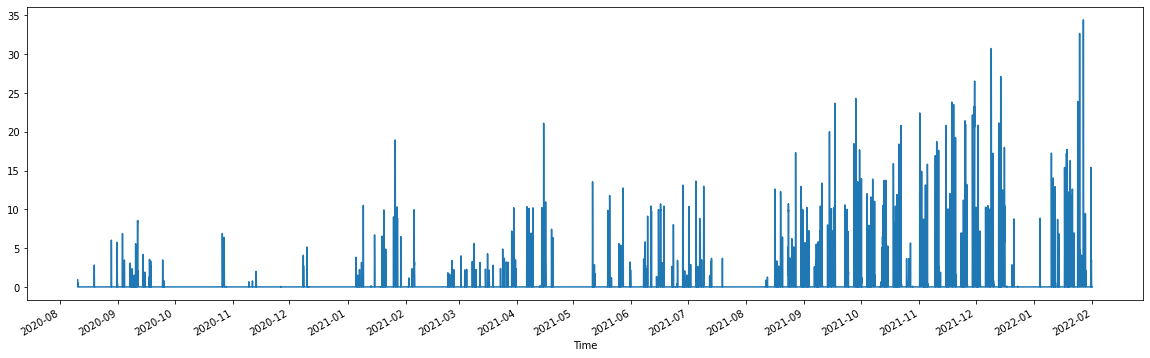

In [60]:
# HAN data
fig = data_total['Energy_kWh'].plot(figsize=(20,6))
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pylab.show()

<AxesSubplot:xlabel='time'>

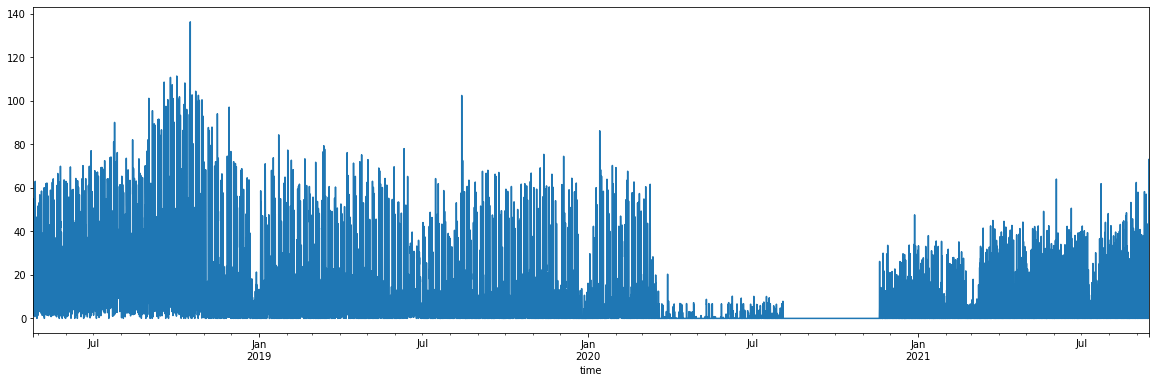

In [62]:
# ACN-caltech data
data_refined['Energy_kWh'].plot(figsize=(20,6))

<AxesSubplot:xlabel='time'>

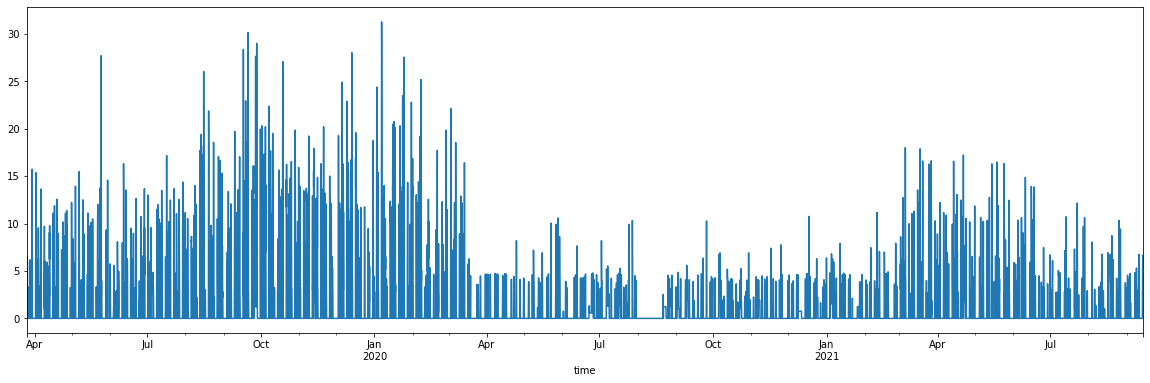

In [63]:
# ACN-office data
data_refined_office['Energy_kWh'].plot(figsize=(20,6))

<AxesSubplot:xlabel='time'>

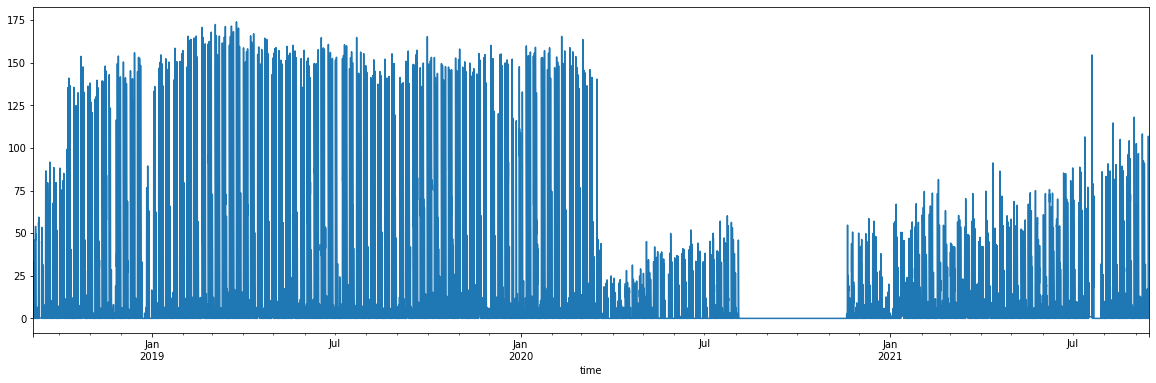

In [64]:
# ACN-JPL data
data_refined_JPL['Energy_kWh'].plot(figsize=(20,6))

The office and JPL data show the same pattern of working hours and weekend like the HAN dataset.

 The Caltech and Office data show the annual pattern like Christmas or summer vacation.

<AxesSubplot:xlabel='Time'>

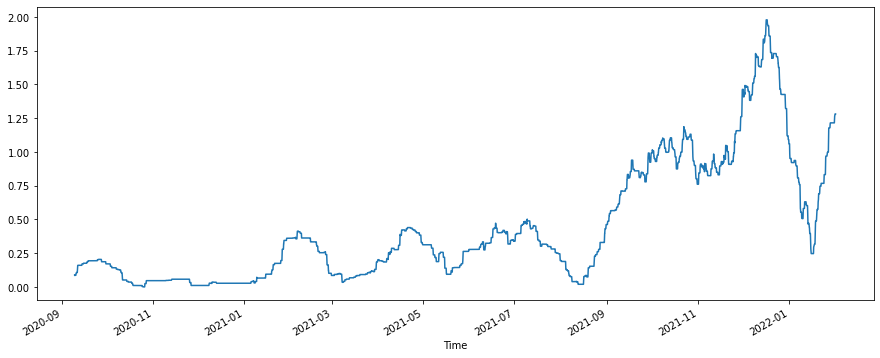

In [70]:
data_total['Mean'].plot(figsize=(15,6))

<AxesSubplot:xlabel='time'>

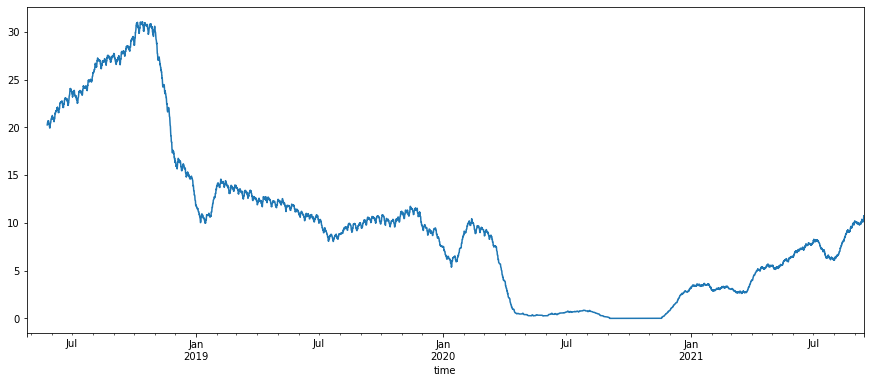

In [71]:
data_refined['Mean'].plot(figsize=(15,6))

<AxesSubplot:xlabel='time'>

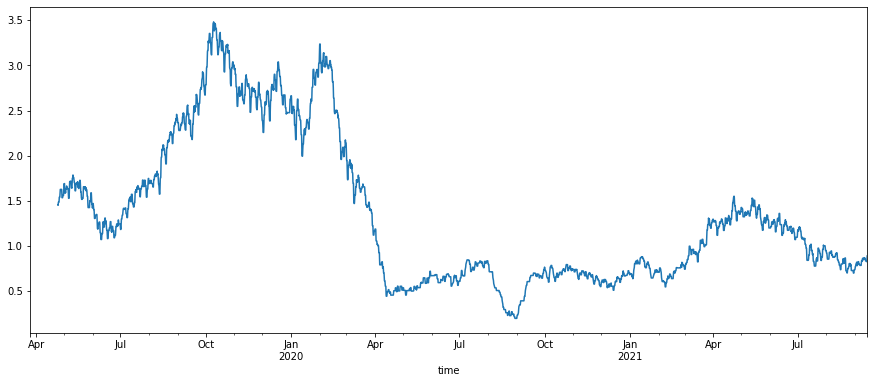

In [72]:
data_refined_office['Mean'].plot(figsize=(15,6))

<AxesSubplot:xlabel='time'>

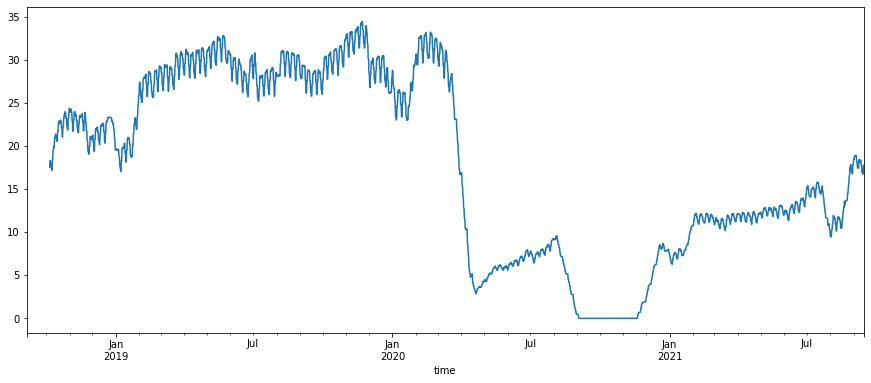

In [73]:
data_refined_JPL['Mean'].plot(figsize=(15,6))

The moving average illustrates the long-term trend. THe plot of caltech data shows the most similar pattern as the HAN data with flat line around Sep 2020 and a dramtical increase around Sep 2021. None of 4 datasets has an annual trend.

<AxesSubplot:xlabel='day_week', ylabel='Energy_kWh'>

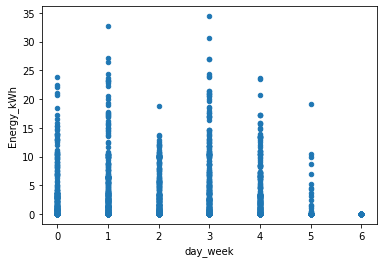

In [77]:
data_total.plot(y='Energy_kWh', x='day_week', kind='scatter')

<AxesSubplot:xlabel='day_week', ylabel='Energy_kWh'>

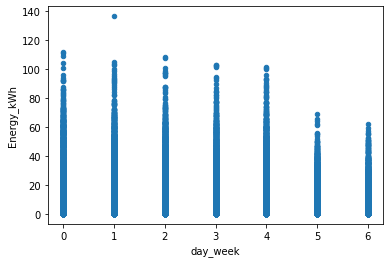

In [78]:
data_refined.plot(y='Energy_kWh', x='day_week', kind='scatter')

<AxesSubplot:xlabel='day_week', ylabel='Energy_kWh'>

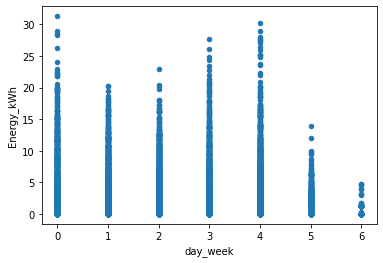

In [79]:
data_refined_office.plot(y='Energy_kWh', x='day_week', kind='scatter')

<AxesSubplot:xlabel='day_week', ylabel='Energy_kWh'>

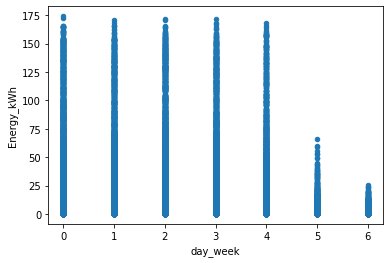

In [81]:
data_refined_JPL.plot(y='Energy_kWh', x='day_week', kind='scatter')

The office data have the most similar pattern as the HAN dataset in term of energy demand in different days of week